# [4.8] 선형회귀(Linear Regression)

## 이론


> 기존의 Data들을 기반으로 하나의 함수를 구해서 모르는 Data 값을 예측하는 알고리즘


　




### 사용되는 용어/개념 정리


#### 회귀 계수(Regression Coefficient)


쉽게 말하면, **방정식의 계수**이다.


$y = ax_1 + bx_2$


위의 1차 함수에서는 $a$와 $b$가 바로 회귀 계수이다.


　


#### 선형 결합(Linear Combination)


> 서로 다른 벡터를 더해 새로운 벡터를 얻는 과정


바로 위에서 보았던


$y = ax_1 + bx_2$


이 함수에서도 $ax_1$과 $bx_2$를 각각 벡터로 가정한다면,


이 함수 역시 $x_1$이라는 벡터에 $a$라는 가중치를 곱한 벡터와 $x_2$라는 벡터에 $b$라는 가중치를 곱한 벡터의 선형 결합인 것이다.


　


#### 평균 제곱 오차(Mean Squared Error, MSE)


> 각 Data와 함수 사이의 거리(error, 오차)를 제곱한 값을 모두 더해 평균낸 값


$y = \theta x$라는 함수가 있다고 해보자.


이때, $i$번째 Data와 이 함수의 오차는 다음과 같이 구할 수 있다.


$error = (y_i - \theta x_i)$


그렇다면, 제곱 오차(Squared Error)는 다음과 같다.


$square error = (y_i - \theta x_i)^2$


그냥 오차는 음수와 양수 모두를 값으로 가질 수 있지만, 제곱 오차는 항상 양수를 갖는다.


따라서 어느 회귀 모델이 나은지 비교할 때, 제곱 오차를 많이 사용한다.


이러한 방식으로 평균 제곱 오차(MSE)를 수식으로 나타내면 다음과 같다.


$f(\theta) = \frac{1}{n}\sum_{i=0}^n(y_i - \theta x_i)^2$


결국 **선형회귀 모델의 목적 함수는 이 평균 제곱 오차 함수인 '$f(\theta)$'를 최소화하는 것**이다!


　


#### 경사 하강법(Gradient Descent)


회귀 계수를 구할 때 사용하는 방법 중 하나이다.


초기 회귀 계수를 임의값으로 설정한 후, 경사하강법을 반복해서 최소의 MSE를 가지는 회귀 계수($\theta$)를 구한다.


공식은 다음과 같다.


$\theta := \theta - \alpha \frac{\partial}{\partial\theta} f(\theta)$


여기서 $\alpha$는 '학습률(learning rate)'을 의미한다.


- $\alpha$의 값이 클수록 $\theta$의 값이 크게 변하며, $\alpha$의 값이 작을수록 $\theta$의 값이 작게 변한다.


공식을 설명하자면 이렇다!


어느 한 지점에서의 $f(\theta)$의 미분값과 반대되는 방향, 즉 -(미분값 x $\alpha$)만큼 $\theta$의 값을 변경해서 최적의 $\theta$의 값을 향해(변곡점에 더 가까운 값으로) 이동하는 것이다.


이 과정을 반복함으로써 $f(\theta)$를 최소로 하는 $\theta$값을 구하는 것이다.

## 실습) 선형회귀


선형회귀(Linear Regression)에 대해서 시각적으로 이해하기 위해 $y = \omega x$의 형태를 갖는 선형회귀를 구현해보았다.

In [1]:
# 필요한 모듈 불러오기

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Data 생성 및 조회

In [2]:
X = np.linspace(0, 10, 10)
Y = X + np.random.randn(*X.shape)

In [3]:
for x, y in zip(X, Y):
    print((round(x, 1), round(y, 1)))

(0.0, 0.7)
(1.1, 2.5)
(2.2, 3.1)
(3.3, 4.4)
(4.4, 5.3)
(5.6, 4.6)
(6.7, 7.4)
(7.8, 8.8)
(8.9, 9.4)
(10.0, 10.8)


### 선형회귀 모델 만들기


`tensorflow`의 `keras` 모듈 중 `Sequential()`을 이용하여 선형회귀 모델을 구현하였다.

In [4]:
model = Sequential()
model.add(Dense(input_dim = 1, units = 1, activation = 'linear', use_bias = False))

In [5]:
sgd = optimizers.SGD(learning_rate = 0.05)
model.compile(optimizer = 'sgd', loss = 'mse')

In [6]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]

print('initial w is : {}'.format(w))

initial w is : 0.43982231616973877


### 선형회귀 모델 학습

In [7]:
model.fit(X, Y, batch_size = 10, epochs = 10, verbose = 1)

Epoch 1/10
1/1 [==============================] - 0s 10ms/step - loss: 15.3328
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 1.8800
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6990
Epoch 4/10
1/1 [==============================] - 0s 70ms/step - loss: 0.5953
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 0.5862
Epoch 6/10
1/1 [==============================] - 0s 15ms/step - loss: 0.5854
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 0.5853
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.5853
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.5853
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 0.5853


### 모델 시각화

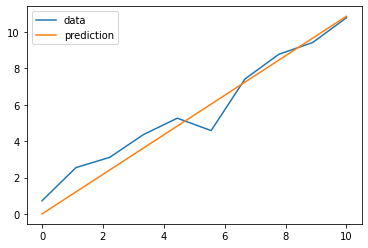

In [8]:
new_weights = model.layers[0].get_weights()
new_w = new_weights[0][0][0]

plt.plot(X, Y, label = 'data')
plt.plot(X, new_w * X, label = 'prediction')
plt.legend()
plt.show()